In [39]:
## Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels as sm
from sklearn import utils
from statsmodels import tools

%matplotlib inline

np.random.seed(100)

In [40]:
filename = r"C:\Users\Priyanka Popeta\Downloads\auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
automobiledata = pd.read_csv(filename, delim_whitespace=True, names=column_names)

In [41]:
automobiledata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [42]:
automobiledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [43]:
automobiledata.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
automobiledata.drop('car_name',axis=1,inplace=True)

In [45]:
automobiledata.horsepower = automobiledata.horsepower.str.replace('?','NaN').astype(float)
automobiledata['horsepower'] = automobiledata['horsepower'].astype(float)

In [46]:
automobiledata.info()
#now we will have all the numeric values on which we can do analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


<AxesSubplot:>

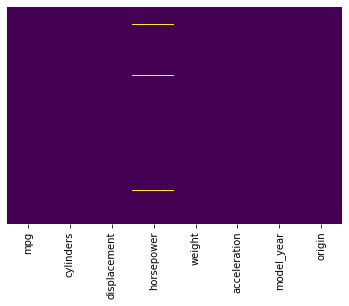

In [47]:
sns.heatmap(automobiledata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
#since their are only few null value we can drop it
automobiledata.dropna(inplace=True)

<AxesSubplot:>

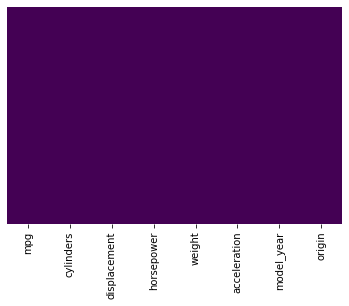

In [49]:
sns.heatmap(automobiledata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now the data looks clean and we can do the further analysis

In [50]:
automobiledata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


<AxesSubplot:>

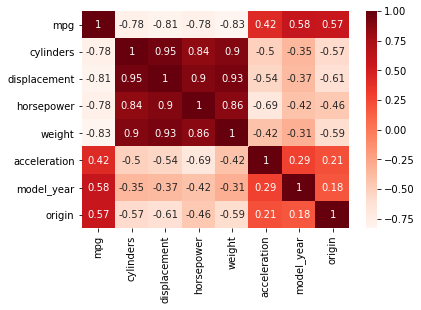

In [51]:
sns.heatmap(automobiledata.corr(),cmap=plt.cm.Reds,annot=True)

1. There is a strong negative correlation between the displacement,horsepower,weight,and cylinders.This implies that,those variables are inverly praportional to the mpg.
2. The displacement,horsepower,weight,and cylinders have a strong positive correlations between themselves and this violates the non-multi collinearity assumption of Linear regression.
3. The other variables.ie.acceleration,model and origin are not highly correlated with each other. 

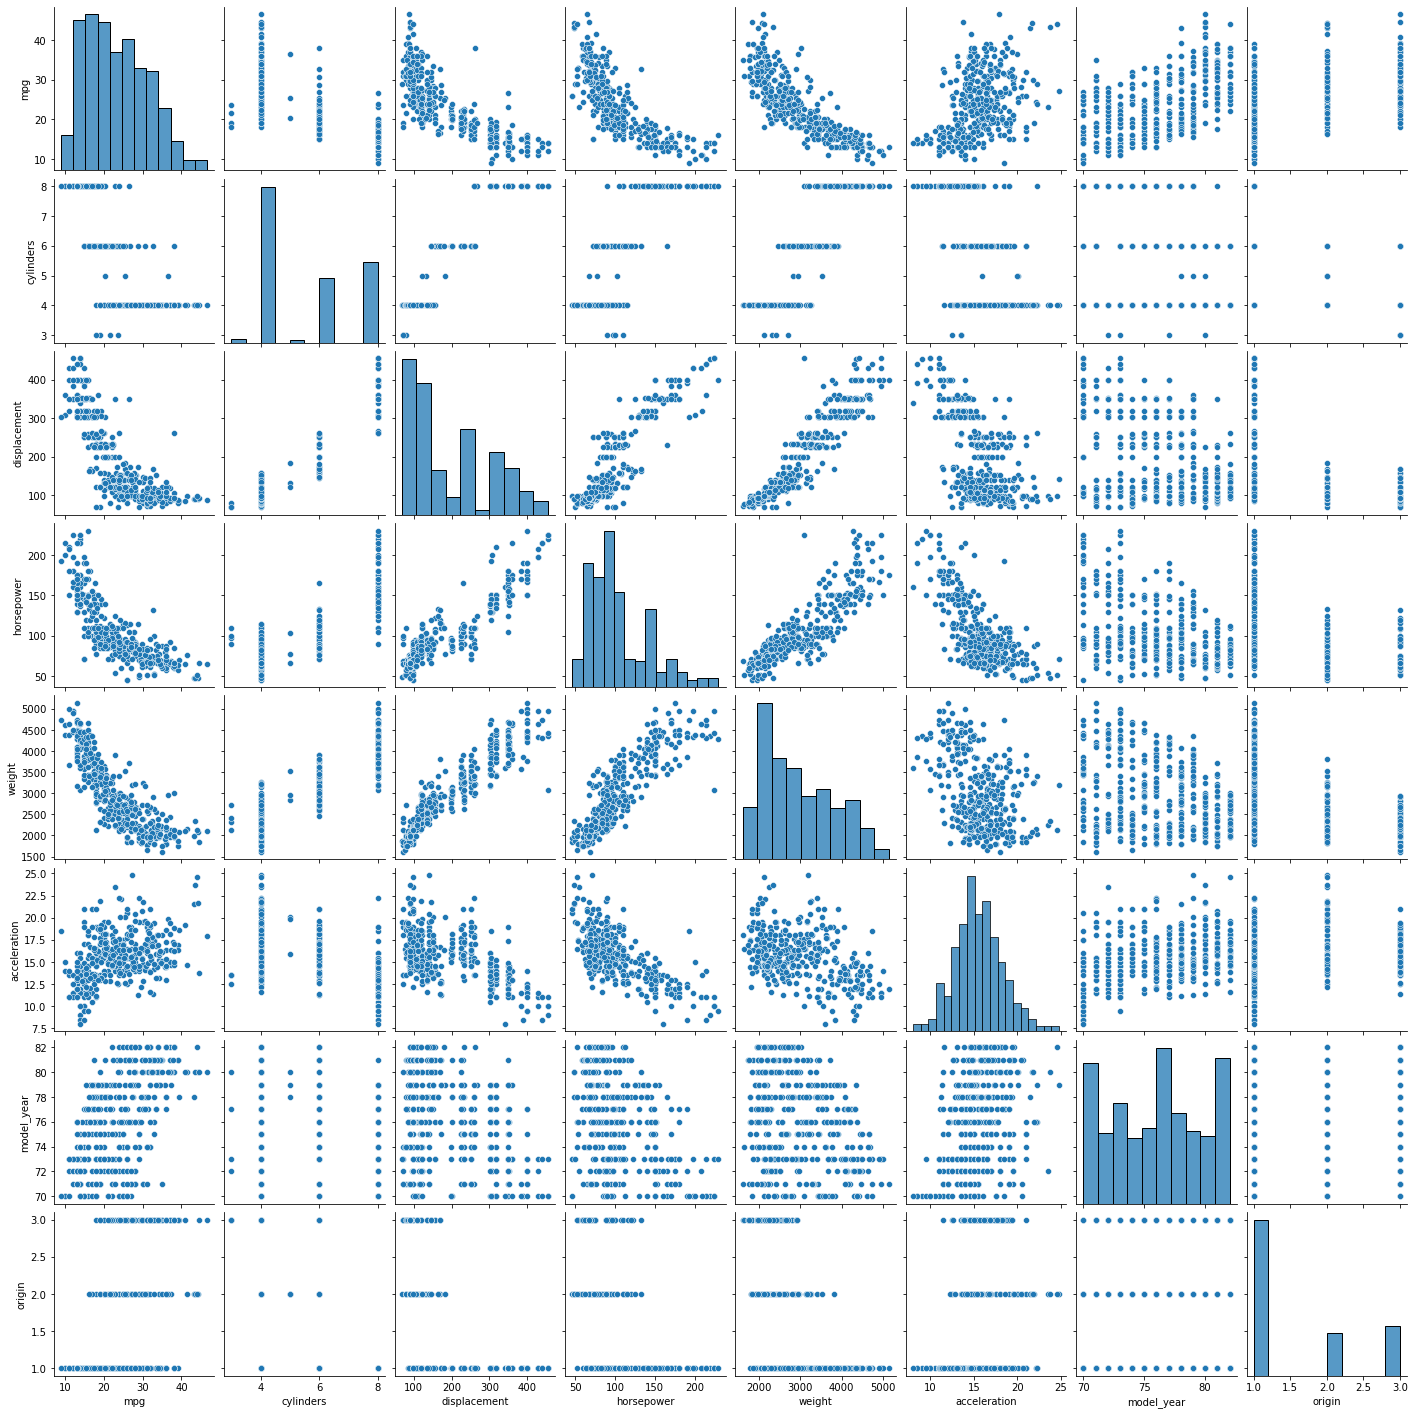

In [52]:
sns.pairplot(automobiledata)

1. Weight and horspower are strongly correlated
2. The acceleration of the cars in the data is normally distributed.
3. Our dependent variable is MPG, which is slightly skewed to the right.

In [77]:
X = automobiledata.drop('mpg',axis=1)
y = automobiledata['mpg']
trans = MinMaxScaler()

Xn_train = trans.fit_transform(X)
Xn_train = pd.DataFrame(Xn_train,columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(Xn_train,y,test_size=0.3)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [78]:
print("Train Accuracy: "+ str(100 * model.score(X_train, y_train)))

print( "Test Accuracy: "+ str(100 * model.score(X_test, y_test)))

Train Accuracy: 83.26691786890245
Test Accuracy: 78.05153354041121


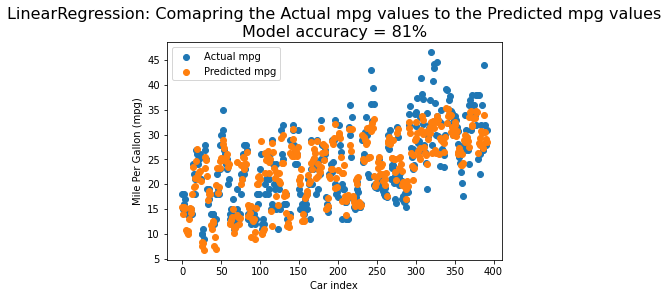

In [79]:
# create a new DataFrame of the feature variables
New_Auto_new_X = automobiledata.drop('mpg',axis=1)  
trans = MinMaxScaler()
New_Auto_new_scaled_X = trans.fit_transform(New_Auto_new_X)
New_Auto_new_scaled_X = pd.DataFrame(New_Auto_new_scaled_X, columns = New_Auto_new_X.columns)
# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':automobiledata.mpg.values,'Predicted mpg':model.predict(New_Auto_new_scaled_X.values)})
# make a scatter plot of the actual and the predicted mpg of a car
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('LinearRegression: Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 81%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()